# Linear Regression: Jupyter Notebook

## `pandas.DataFrame`

### Reading Data

Using `read_csv()` from pandas, read data into dataframe. If your data happens to be in a M$ Excel file, then there is also a `read_excel()` function.

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('./history_data.csv')

### Relationship Between `pandas.DataFrame` and `numpy.ndarray` 

See how a DataFrame holds values using `numpy.ndarray`.

In [3]:
dataset.values

array([['New York', 'New York', nan, ..., 0.0, nan, 'Clear'],
       ['New York', 'New York', nan, ..., 0.0, nan, 'Clear'],
       ['New York', 'New York', nan, ..., 0.0, 87.77, 'Clear'],
       ...,
       ['New York', 'New York', nan, ..., 23.3, 74.96, 'Clear'],
       ['New York', 'New York', nan, ..., 14.3, 70.33, 'Clear'],
       ['New York', 'New York', nan, ..., 0.0, 84.26, 'Clear']],
      dtype=object)

In [4]:
type(dataset.values)

numpy.ndarray

For convenience, `pandas.DataFrame` provides many attributes from the underlying `numpy.ndarray`.

Two dimensional array ...

In [5]:
dataset.ndim

2

... extending such and such cell in each direction ...

In [6]:
dataset.values.shape

(72, 16)

In [7]:
dataset.shape

(72, 16)

`DataFrame.describe()` is convenient for interactive use in a Jupyter notebook, just like many other methods.

In [8]:
dataset.describe()

,Resolved Address,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Cloud Cover,Relative Humidity
count,0.0,72.000000,72.000000,72.000000,0.0,22.000000,72.000000,0.0,72.000000,65.000000,72.000000,38.000000
mean,NaN,82.995833,70.688889,76.287500,NaN,91.327273,0.012222,NaN,12.690278,20.470769,3.369444,72.513421
std,NaN,5.946106,5.574023,5.313256,NaN,5.994536,0.070695,NaN,6.025980,8.302423,7.214825,12.665492
min,NaN,69.900000,53.300000,61.500000,NaN,82.400000,0.000000,NaN,2.200000,4.700000,0.000000,46.090000
25%,NaN,79.050000,68.900000,74.300000,NaN,87.050000,0.000000,NaN,9.100000,15.000000,0.000000,66.377500
50%,NaN,83.750000,71.950000,76.650000,NaN,89.750000,0.000000,NaN,12.800000,19.700000,0.000000,72.330000
75%,NaN,87.950000,74.325000,79.850000,NaN,95.950000,0.000000,NaN,15.425000,25.300000,2.825000,81.715000
max,NaN,92.900000,80.700000,85.800000,NaN,101.600000,0.470000,NaN,38.000000,50.600000,34.500000,96.970000


### Extracting Input and Output Features from a `pandas.DataFrame`

Beware that algorithms expect a two dimensional array as the set of inputs. Using the column header ("Minimum Temperature") to index the dataframe gives a list-like type. **Wrong!!**

In [9]:
inputfeatures = dataset['Minimum Temperature']

In [10]:
inputfeatures

0     53.3
1     58.7
2     60.2
3     66.8
4     68.3
      ... 
67    70.1
68    72.2
69    72.1
70    75.5
71    78.2
Name: Minimum Temperature, Length: 72, dtype: float64

In [11]:
type(inputfeatures)

pandas.core.series.Series

**Correction**: index the dataframe *with a list of column headers*

In [12]:
inputfeatures = dataset[['Minimum Temperature']]

Sign of correctness: that one is made up more nicely by the notebook:

In [13]:
inputfeatures

,Minimum Temperature
0,53.3
1,58.7
2,60.2
3,66.8
4,68.3
...,...
67,70.1
68,72.2
69,72.1
70,75.5


Likewise, the output features.

In [14]:
outputfeatures = dataset[['Maximum Temperature']]

## Plotting with `matplotlib`

Fortunately (well, that was on purpose), our feature sets are one dimensional, so plotting the dataset im two dimensions makes sense. Multidimensional data analysis is not so straightforward - this is why they call it data **science**.

In [15]:
import matplotlib.pyplot as plt

`pandas.DataFrame` interacts nicely with `matplotlib`. 

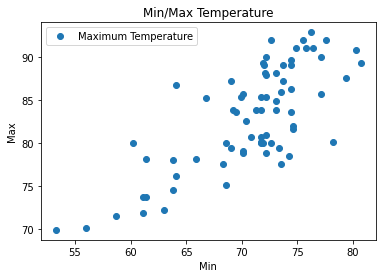

In [16]:
dataset.plot(x='Minimum Temperature', y='Maximum Temperature', style='o')
plt.title('Min/Max Temperature')
plt.xlabel('Min')
plt.ylabel('Max')
plt.show()

## Data Splicing: Split into Training and Test Data

Before creating the model (from an algorithm and a dataset), we prepare the dataset
* 80% for training
* 20% for testing/verification

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
input_train, input_test, output_train, output_test = \
     train_test_split(inputfeatures, outputfeatures, test_size=0.2, random_state=0)

## Creating the Model: Algorithm + Training Data

In [19]:
from sklearn.linear_model import LinearRegression

Initially, the model *is* the algorithm

In [20]:
model = LinearRegression()

Next, we feed it the training data

In [21]:
model = model.fit(input_train, input_train)

Model is complete; see the parameters of the linear interpolation (would need theory to better understand):

In [22]:
model.coef_

array([[1.]])

In [23]:
model.intercept_

array([0.])

## Verify the Model

We saved 20% of the dataset for verification.
* Use the model to predict the output for the input test data.
* Compare prediction to actual output test set

In [24]:
output_predicted = model.predict(input_test)

Here we (ab)use a `pandas.DataFrame` to nicely format actual output test data and predicted output side by side.

**Note** that `input_test` is a `pd.DataFrame`, but `output_predicted` is a `numpy.ndarray`.

**Reason**:`model.predict()` is happy with anything that supports indexing (thanks to duck typing - we gave it a `Dataframe`), but its output is always a `numpy.ndarray`

In [25]:
pd.DataFrame({'Actual': output_test.values.reshape((15,)),
              'Predicted': output_predicted.reshape((15,))})


,Actual,Predicted
0,80.0,71.9
1,84.9,73.1
2,91.1,75.8
3,80.0,72.6
4,78.2,65.9
5,92.0,72.6
6,78.2,61.4
7,92.0,77.6
8,85.4,71.7
9,80.1,78.2


Comparing the actual and predicted values, we can see that they are "not far off". Whatever this means - in a real data science world (this is only the surface), we would now have to use advanced statistical methods to actually measure the term "not far off".

But this is left to data scientists. Our job is to create correct programs, and to keep those *maintainable*.